<a href="https://colab.research.google.com/github/jaswanthmathan/project/blob/main/JASWANTH_DAY33_DIY_SOLUTION_DOC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q1. Problem Statement: Data Pre-Processing (Categorical
Data)
You are given a dataset – “hotel_bookings.csv.” The dataset has a high
number of null and elements that need to be cleansed; Your job is to
create a separate DataFrame with only categorical columns and perform
the following operations:
1. Find the number of null values in each column of the new DataFrame
2. Replace the null values with mode
3. In the "hotel" column, replace the hotel names with "0" and "1" based on the
condition that – if, "hotel" = "city_hotel", then "hotel" = "1"; else, "0"
4. Using the label encoder, assign a unique country code to each country
5. Using onehot encoder, encode the month column


In [10]:
import pandas as pd
import numpy as np
df=pd.read_csv("hotel_bookings.csv")
np.random.seed(0)
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015.0,July,27.0,1.0,0.0,0.0,2.0,...,No Deposit,NaN,NaN,0.0,Transient,0.00,0.0,0.0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015.0,July,27.0,1.0,0.0,0.0,2.0,...,No Deposit,NaN,NaN,0.0,Transient,0.00,0.0,0.0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015.0,July,27.0,1.0,0.0,1.0,1.0,...,No Deposit,NaN,NaN,0.0,Transient,75.00,0.0,0.0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015.0,July,27.0,1.0,0.0,1.0,1.0,...,No Deposit,304.0,NaN,0.0,Transient,75.00,0.0,0.0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015.0,July,27.0,1.0,0.0,2.0,2.0,...,No Deposit,240.0,NaN,0.0,Transient,98.00,0.0,1.0,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96461,City Hotel,0,30,2016.0,September,36.0,1.0,0.0,2.0,2.0,...,No Deposit,9.0,NaN,0.0,Transient,153.00,0.0,2.0,Check-Out,2016-09-03
96462,City Hotel,0,8,2016.0,September,36.0,2.0,0.0,1.0,2.0,...,No Deposit,9.0,NaN,0.0,Transient,119.00,0.0,1.0,Check-Out,2016-09-03
96463,City Hotel,0,145,2016.0,August,36.0,29.0,1.0,4.0,2.0,...,No Deposit,9.0,NaN,0.0,Transient,128.34,0.0,0.0,Check-Out,2016-09-03
96464,City Hotel,0,222,2016.0,August,36.0,31.0,0.0,3.0,2.0,...,No Deposit,9.0,NaN,0.0,Transient,96.30,0.0,1.0,Check-Out,2016-09-03


In [ ]:

df.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             487
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             12057
company                           76928


In [ ]:
df=df.drop(['company','agent'],axis=1)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
cat_df=df.select_dtypes(include=['object']).copy()
cat_df.head()

print(cat_df.isnull().sum())

hotel                        0
arrival_date_month           0
meal                         0
country                    487
market_segment               0
distribution_channel         0
reserved_room_type           0
assigned_room_type           0
deposit_type                 0
customer_type                0
reservation_status           0
reservation_status_date      0
dtype: int64


In [ ]:
_cat_df=cat_df.fillna(cat_df['country'].mode()[0],inplace=True)
print('After replacing null values with mode:')
print(cat_df.isnull().sum())

After replacing null values with mode:
hotel                      0
arrival_date_month         0
meal                       0
country                    0
market_segment             0
distribution_channel       0
reserved_room_type         0
assigned_room_type         0
deposit_type               0
customer_type              0
reservation_status         0
reservation_status_date    0
dtype: int64


In [ ]:

cat_df_spf=cat_df.copy()
cat_df_spf['hotel']=np.where(cat_df_spf['hotel'].str.contains('City Hotel'),1,0)
cat_df_spf.sample(10)

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
18135,0,November,BB,NOR,Direct,Direct,D,D,No Deposit,Transient,Check-Out,2015-11-07
76079,1,October,HB,PRT,Offline TA/TO,TA/TO,A,A,Non Refund,Transient-Party,Canceled,2015-07-06
23681,0,April,BB,ESP,Offline TA/TO,TA/TO,A,D,No Deposit,Transient,Check-Out,2016-05-01
36739,0,May,BB,CN,Groups,TA/TO,E,E,No Deposit,Transient-Party,Check-Out,2017-05-28
43740,1,September,BB,ITA,Online TA,TA/TO,A,D,No Deposit,Transient,Check-Out,2015-09-28
25866,0,July,BB,USA,Direct,Direct,A,A,No Deposit,Transient,Check-Out,2016-07-15
48105,1,March,BB,USA,Online TA,TA/TO,B,B,No Deposit,Transient-Party,Check-Out,2016-03-19
23236,0,April,BB,PRT,Direct,Direct,D,D,No Deposit,Transient,Check-Out,2016-04-19
71502,1,July,SC,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Canceled,2017-02-25
32237,0,January,Undefined,PRT,Groups,Direct,A,D,No Deposit,Transient-Party,Check-Out,2017-01-19


In [ ]:
cat_df_spf1=cat_df_spf.copy()
from sklearn.preprocessing import LabelEncoder
lb_make=LabelEncoder()
cat_df_spf1['country_code']=lb_make.fit_transform(cat_df_spf['country'])
cat_df_spf1.sample(5)

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date,country_code
62012,1,December,BB,PRT,Direct,Direct,D,D,No Deposit,Transient,Canceled,2016-12-14,116
38691,0,July,BB,GBR,Offline TA/TO,TA/TO,A,A,No Deposit,Contract,Check-Out,2017-07-27,50
21860,0,March,BB,PRT,Direct,Direct,A,A,No Deposit,Transient,Check-Out,2016-03-12,116
2440,0,October,BB,GBR,Groups,Corporate,A,E,No Deposit,Transient-Party,Check-Out,2015-10-18,50
64681,1,March,BB,PRT,Groups,TA/TO,A,A,Non Refund,Transient,Canceled,2017-02-06,116


In [ ]:

cat_onehot=cat_df_spf.copy()
cat_onehot=pd.get_dummies(cat_onehot,columns=['arrival_date_month'])
print(cat_onehot.head())

   hotel meal country market_segment distribution_channel reserved_room_type  \
0      0   BB     PRT         Direct               Direct                  C   
1      0   BB     PRT         Direct               Direct                  C   
2      0   BB     GBR         Direct               Direct                  A   
3      0   BB     GBR      Corporate            Corporate                  A   
4      0   BB     GBR      Online TA                TA/TO                  A   

  assigned_room_type deposit_type customer_type reservation_status  ...  \
0                  C   No Deposit     Transient          Check-Out  ...   
1                  C   No Deposit     Transient          Check-Out  ...   
2                  C   No Deposit     Transient          Check-Out  ...   
3                  A   No Deposit     Transient          Check-Out  ...   
4                  A   No Deposit     Transient          Check-Out  ...   

  arrival_date_month_December  arrival_date_month_February  \
0     


Q2. Problem Statement: Data Pre-Processing (Exponential Data)
Create a DataFrame to store exponential data using the NumPy
random() function as shown in the dataset section below, and perform
the following operations:
1. Using the minmax_scaling() function, scale the data between 0 to 1,
and plot the original data and scaled data using the Seaborn library
2. Using preprocessing.normalize() function, normalize the data, and
plot the original data and normalized data using the Seaborn library



In [11]:
from mlxtend.preprocessing import minmax_scaling
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
np.random.seed(100)
data=np.random.exponential(size=1000)
df2=pd.DataFrame(data)
df2.head()

,0
0,0.783958
1,0.326242
2,0.552547
3,1.862887
4,0.004730


<ipython-input-13-3d0989bdb773>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data,ax=ax[0])
<ipython-input-13-3d0989bdb773>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(scaled_data,ax=ax[1])


Text(0.5, 1.0, 'Scaled data')

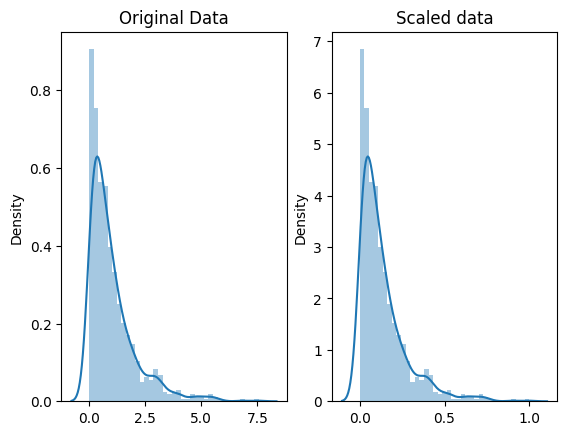

In [13]:
scaled_data=minmax_scaling(df2,columns=[0])
fig,ax=plt.subplots(1,2)
sns.distplot(data,ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(scaled_data,ax=ax[1])
ax[1].set_title("Scaled data")

<ipython-input-15-ab9d6e1a5df2>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2[0],ax=ax[0])
<ipython-input-15-ab9d6e1a5df2>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(normalized_data,ax=ax[1])
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2511: UserWarning: Dataset 

Text(0.5, 1.0, 'Normalized data')

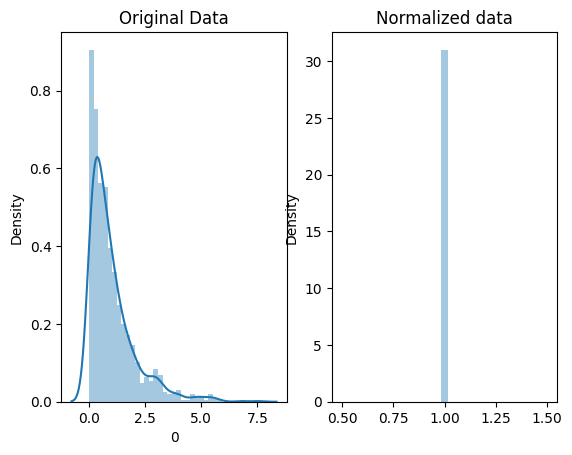

In [15]:
from scipy import stats
from sklearn import preprocessing
normalized_data=preprocessing.normalize(df2)
fig,ax=plt.subplots(1,2)
sns.distplot(df2[0],ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(normalized_data,ax=ax[1])
ax[1].set_title('Normalized data')